In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
import seaborn as sns

In [37]:
ic50 = pd.read_csv(
    "../data/drug/DrugResponse_PANCANCER_GDSC1_GDSC2_IC_20191119.csv")

ic50 = ic50.sort_values(by=['Dataset version']).reset_index(drop=True)
ic50 = ic50.drop_duplicates(
    ['Drug Id', 'Cell line name'], keep='last').sort_values(
        by=['Drug Id', 'Cell line name']).reset_index(drop=True)

In [38]:
ic50['IC50_raw'] = np.exp(ic50['IC50'])

In [39]:
ic50['IC50_norm_raw'] = ic50['IC50_raw'] / ic50['Max conc']

In [41]:
ic50['IC50_norm'] = np.log(ic50['IC50_norm_raw'])

In [53]:
ic50.head()

,Drug name,Drug Id,Cell line name,Cosmic sample Id,TCGA classification,Tissue,Tissue sub-type,IC50,AUC,Max conc,RMSE,Z score,Dataset version,IC50_raw,IC50_norm_raw,IC50_norm,sensitive,IC50_norm_scaled
0,Erlotinib,1,697,906800,UNCLASSIFIED,blood,lymphoblastic_leukemia,0.742914,0.913203,2.0,0.049765,-1.738051,GDSC1,2.102051,1.051026,0.049767,0,0.571578
1,Erlotinib,1,8-MG-BA,687562,GBM,nervous_system,glioma,2.494802,0.980211,2.0,0.041886,-0.096714,GDSC1,12.119336,6.059668,1.801655,0,0.675950
2,Erlotinib,1,A101D,910921,SKCM,skin,melanoma,2.325466,0.940629,2.0,0.154550,-0.255364,GDSC1,10.231446,5.115723,1.632319,0,0.665862
3,Erlotinib,1,A253,906794,UNCLASSIFIED,aero_digestive_tract,head_and_neck,0.164247,0.817106,2.0,0.135200,-2.280201,GDSC1,1.178505,0.589253,-0.528900,1,0.537103
4,Erlotinib,1,A3-KAW,910935,DLBC,blood,B_cell_lymphoma,1.110715,0.950440,2.0,0.053414,-1.393460,GDSC1,3.036528,1.518264,0.417567,0,0.593491


In [43]:
ic50['sensitive'] = (ic50['IC50_raw'] < ic50['Max conc']).astype(int)

In [52]:
ic50.to_csv("../data/drug/ic50_processed.csv", index=False)

In [45]:
ic50['IC50_norm'].describe()

count    363120.000000
mean          0.521027
std           2.152474
min          -9.544189
25%          -0.792537
50%           0.877450
75%           2.191838
max           7.240840
Name: IC50_norm, dtype: float64

In [51]:
ic50['IC50_norm_scaled'] = MinMaxScaler().fit_transform(ic50['IC50_norm'].values.reshape(-1,1))

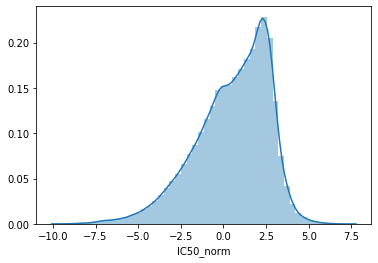

In [47]:
sns.distplot(ic50['IC50_norm'])

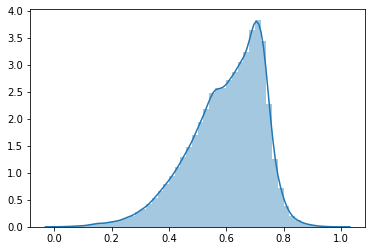

In [50]:
sns.distplot(MinMaxScaler().fit_transform(ic50['IC50_norm'].values.reshape(-1,1)))